# DengAI Prediction

An attempt is being made to create a model that can predict the number of Dengue fever cases based on a specific week of the year. The data has already been divided into training and testing sets and labeled accordingly.

In [1]:
# import the basic necessery libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [4]:
# read all the data set
dengue_label_data = pd.read_csv('dengue_labels_train.csv')
dengue_feature_train_data = pd.read_csv('dengue_features_train.csv')
dengue_feature_test_data = pd.read_csv('dengue_features_test.csv')

from IPython.display import display, HTML

# Define CSS styles for scrollable tables
css_style = """
<style>
table {
    font-family: Arial, sans-serif;
    border-collapse: collapse;
 
}

td, th {
    border: 1px solid #dddddd;
    text-align: center;
    padding: 4px;
}

</style>
"""

# Display the DataFrame
display(HTML(css_style))
print("Dengue Label Data:")
display(dengue_label_data.head())

print("\nDengue Feature Train Data:")
display(dengue_feature_train_data.head())

print("\nDengue Feature Test Data:")
display(dengue_feature_test_data.head())


Dengue Label Data:


,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6



Dengue Feature Train Data:


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8



Dengue Feature Test Data:


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


### Abbreiviations

city – City abbreviations: sj for San Juan and iq for Iquitos\
week_start_date – Date given in yyyy-mm-dd format

ndvi_se – Pixel southeast of city centroid\
ndvi_sw – Pixel southwest of city centroid\
ndvi_ne – Pixel northeast of city centroid\
ndvi_nw – Pixel northwest of city centroid

precipitation_amt_mm – Total precipitation

reanalysis_sat_precip_amt_mm – Total precipitation\
reanalysis_dew_point_temp_k – Mean dew point temperature\
reanalysis_air_temp_k – Mean air temperature\
reanalysis_relative_humidity_percent – Mean relative humidity\
reanalysis_specific_humidity_g_per_kg – Mean specific humidity\
reanalysis_precip_amt_kg_per_m2 – Total precipitation\
reanalysis_max_air_temp_k – Maximum air temperature\
reanalysis_min_air_temp_k – Minimum air temperature\
reanalysis_avg_temp_k – Average air temperature\
reanalysis_tdtr_k – Diurnal temperature range

station_max_temp_c – Maximum temperature\
station_min_temp_c – Minimum temperature\
station_avg_temp_c – Average temperature\
station_precip_mm – Total precipitation\
station_diur_temp_rng_c – Diurnal temperature range

In [5]:
dengue_feature_train_data.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

<Axes: xlabel='year', ylabel='reanalysis_air_temp_k'>

<Axes: xlabel='year', ylabel='reanalysis_air_temp_k'>

<Axes: xlabel='year', ylabel='reanalysis_air_temp_k'>

<Axes: xlabel='year', ylabel='reanalysis_air_temp_k'>

Text(0.5, 1.0, 'Temperature-related Features in Kelvin')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Value')

<Axes: xlabel='year', ylabel='station_avg_temp_c'>

<Axes: xlabel='year', ylabel='station_avg_temp_c'>

<Axes: xlabel='year', ylabel='station_avg_temp_c'>

Text(0.5, 1.0, 'Temperature-related Features in Celsius')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Value')

<Axes: xlabel='year', ylabel='reanalysis_relative_humidity_percent'>

<Axes: xlabel='year', ylabel='reanalysis_relative_humidity_percent'>

Text(0.5, 1.0, 'Humidity-related Features')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Value')

<Axes: xlabel='year', ylabel='precipitation_amt_mm'>

<Axes: xlabel='year', ylabel='precipitation_amt_mm'>

<Axes: xlabel='year', ylabel='precipitation_amt_mm'>

<Axes: xlabel='year', ylabel='precipitation_amt_mm'>

Text(0.5, 1.0, 'Precipitation-related Features')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Value')

<Axes: xlabel='year', ylabel='ndvi_ne'>

<Axes: xlabel='year', ylabel='ndvi_ne'>

<Axes: xlabel='year', ylabel='ndvi_ne'>

<Axes: xlabel='year', ylabel='ndvi_ne'>

Text(0.5, 1.0, 'Vegetation-related Features')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Value')

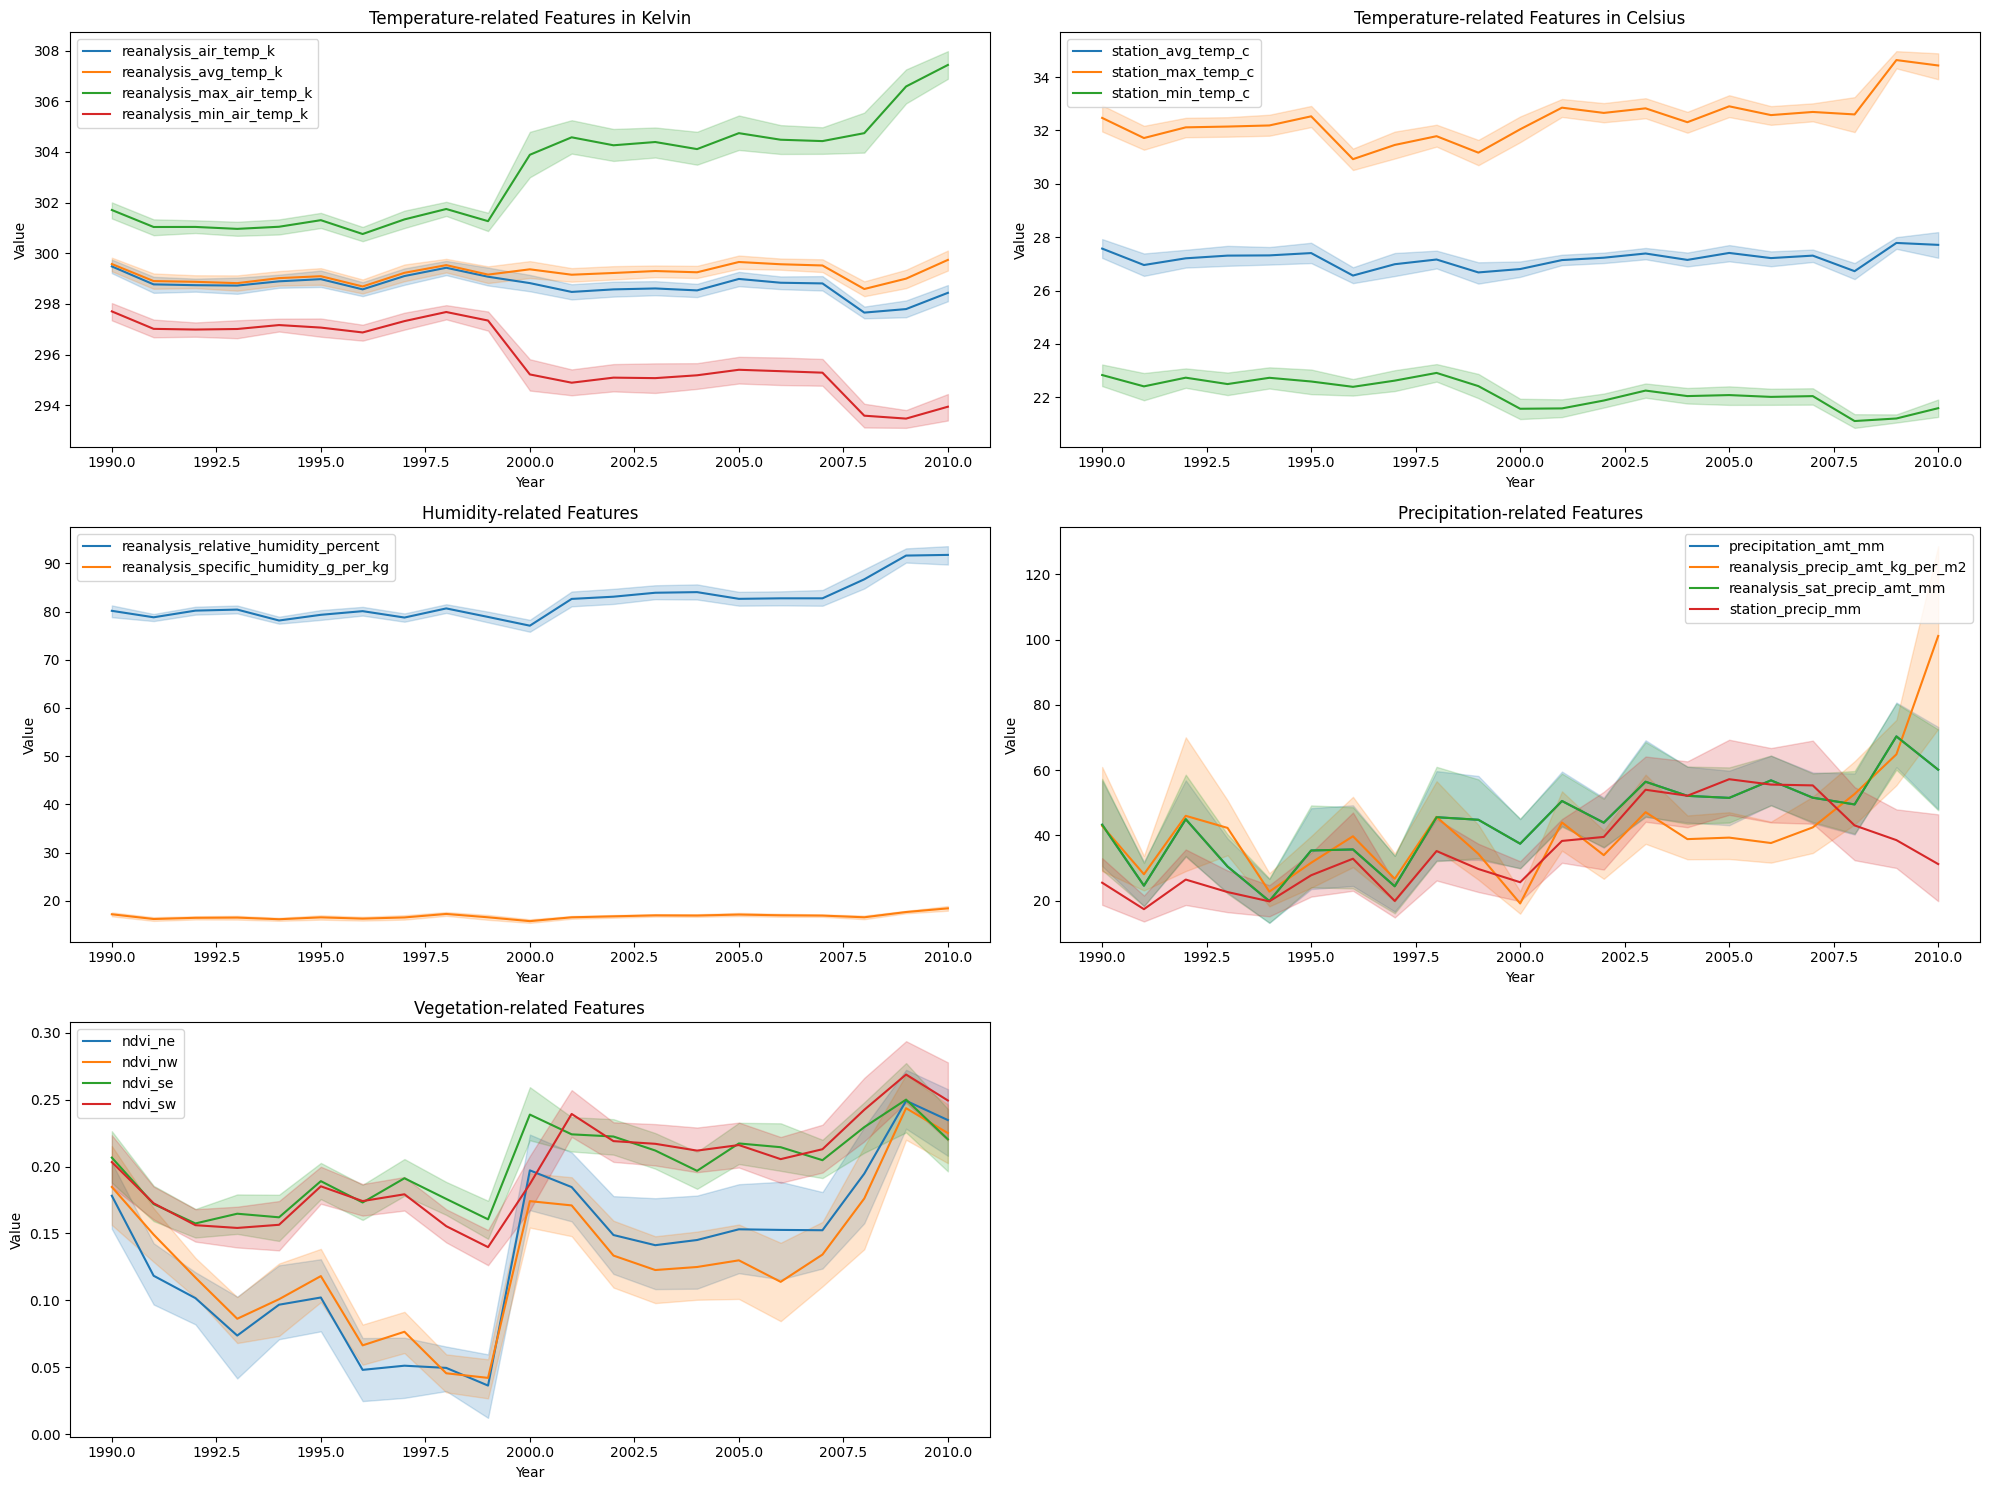

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define groups of similar features
temperature_features_in_K = ['reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k']
temperature_features_in_C = ['station_avg_temp_c', 'station_max_temp_c', 'station_min_temp_c']
humidity_features = ['reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg']
precipitation_features = ['precipitation_amt_mm', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_sat_precip_amt_mm', 'station_precip_mm']
vegetation_features = ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']

# Create subplots for each feature group
fig, axs = plt.subplots(3, 2, figsize=(20, 15))

# Plot temperature-related features in Kelvin
for column in temperature_features_in_K:
    sns.lineplot(data=dengue_feature_train_data, x='year', y=column, label=column, ax=axs[0, 0])
axs[0, 0].set_title('Temperature-related Features in Kelvin')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Value')
axs[0, 0].legend()

# Plot temperature-related features in Celsius
for column in temperature_features_in_C:
    sns.lineplot(data=dengue_feature_train_data, x='year', y=column, label=column, ax=axs[0, 1])
axs[0, 1].set_title('Temperature-related Features in Celsius')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Value')
axs[0, 1].legend()

# Plot humidity-related features
for column in humidity_features:
    sns.lineplot(data=dengue_feature_train_data, x='year', y=column, label=column, ax=axs[1, 0])
axs[1, 0].set_title('Humidity-related Features')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Value')
axs[1, 0].legend()

# Plot precipitation-related features
for column in precipitation_features:
    sns.lineplot(data=dengue_feature_train_data, x='year', y=column, label=column, ax=axs[1, 1])
axs[1, 1].set_title('Precipitation-related Features')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Value')
axs[1, 1].legend()

# Plot vegetation-related features
for column in vegetation_features:
    sns.lineplot(data=dengue_feature_train_data, x='year', y=column, label=column, ax=axs[2, 0])
axs[2, 0].set_title('Vegetation-related Features')
axs[2, 0].set_xlabel('Year')
axs[2, 0].set_ylabel('Value')
axs[2, 0].legend()

# Remove the empty subplot
fig.delaxes(axs[2, 1])

plt.tight_layout()
plt.show()



In [7]:
# Display the DataFrame descriptions

print("Dengue Label Data Description:")
display(dengue_label_data.describe())

print("\nDengue Feature Train Data Description:")
display(dengue_feature_train_data.describe())

print("\nDengue Feature Test Data Description:")
display(dengue_feature_test_data.describe())

Dengue Label Data Description:


,year,weekofyear,total_cases
count,1456.000000,1456.000000,1456.000000
mean,2001.031593,26.503434,24.675137
std,5.408314,15.019437,43.596000
min,1990.000000,1.000000,0.000000
25%,1997.000000,13.750000,5.000000
50%,2002.000000,26.500000,12.000000
75%,2005.000000,39.250000,28.000000
max,2010.000000,53.000000,461.000000



Dengue Feature Train Data Description:


,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000



Dengue Feature Test Data Description:


,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,416.000000,416.000000,373.000000,405.000000,415.000000,415.000000,414.000000,414.000000,414.000000,414.000000,...,414.000000,414.000000,414.000000,414.000000,414.000000,404.000000,404.000000,413.000000,407.000000,411.000000
mean,2010.766827,26.439904,0.126050,0.126803,0.207702,0.201721,38.354324,298.818295,299.353071,295.419179,...,42.171135,82.499810,38.354324,16.927088,5.124569,27.369587,7.810991,32.534625,22.368550,34.278589
std,1.434835,14.978257,0.164353,0.141420,0.079102,0.092028,35.171126,1.469501,1.306233,1.523099,...,48.909514,7.378243,35.171126,1.557868,3.542870,1.232608,2.449718,1.920429,1.731437,34.655966
min,2008.000000,1.000000,-0.463400,-0.211800,0.006200,-0.014671,0.000000,294.554286,295.235714,290.818571,...,0.000000,64.920000,0.000000,12.537143,1.485714,24.157143,4.042857,27.200000,14.200000,0.000000
25%,2010.000000,13.750000,-0.001500,0.015975,0.148670,0.134079,8.175000,297.751429,298.323214,294.335714,...,9.430000,77.397143,8.175000,15.792857,2.446429,26.514286,5.928571,31.100000,21.200000,9.100000
50%,2011.000000,26.000000,0.110100,0.088700,0.204171,0.186471,31.455000,298.547143,299.328571,295.825000,...,25.850000,80.330000,31.455000,17.337143,2.914286,27.483333,6.642857,32.800000,22.200000,23.600000
75%,2012.000000,39.000000,0.263329,0.242400,0.254871,0.253243,57.772500,300.240357,300.521429,296.643571,...,56.475000,88.328929,57.772500,18.174643,8.171429,28.319048,9.812500,33.900000,23.300000,47.750000
max,2013.000000,53.000000,0.500400,0.649000,0.453043,0.529043,169.340000,301.935714,303.328571,297.794286,...,301.400000,97.982857,169.340000,19.598571,14.485714,30.271429,14.725000,38.400000,26.700000,212.000000


There are some missing values can be observe from the describtion of dataset\
Find the missing data and fill them with there nearest values

In [8]:
# display the null values count

print("Dengue Label Data null count:\n", 
      dengue_label_data.isnull().sum())

print("\nDengue Feature Train Data null count:\n",
      dengue_feature_train_data.isnull().sum())

print("\nDengue Feature Test Data null count:\n",
      dengue_feature_test_data.isnull().sum())

Dengue Label Data null count:
 city           0
year           0
weekofyear     0
total_cases    0
dtype: int64

Dengue Feature Train Data null count:
 city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                     

In [9]:
# advanced techniques like interpolation
dengue_feature_train_data.interpolate(method='linear', inplace=True)
dengue_feature_test_data.interpolate(method='linear', inplace=True)
dengue_label_data.interpolate(method='linear', inplace=True)

C:\Users\nilak\AppData\Local\Temp\ipykernel_15080\668277097.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  dengue_feature_train_data.interpolate(method='linear', inplace=True)
C:\Users\nilak\AppData\Local\Temp\ipykernel_15080\668277097.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  dengue_feature_test_data.interpolate(method='linear', inplace=True)
C:\Users\nilak\AppData\Local\Temp\ipykernel_15080\668277097.py:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  dengue_label_data.interpolate(method='linear', inplace=True)


In [10]:
# Convert 'week_start_date' to datetime object
dengue_feature_train_data['week_start_date'] = pd.to_datetime(dengue_feature_train_data['week_start_date'])
dengue_feature_test_data['week_start_date'] = pd.to_datetime(dengue_feature_test_data['week_start_date'])
# Extract additional features like month or day of the week
dengue_feature_train_data['month'] = dengue_feature_train_data['week_start_date'].dt.month
dengue_feature_train_data['day_of_week'] = dengue_feature_train_data['week_start_date'].dt.dayofweek
dengue_feature_test_data['month'] = dengue_feature_test_data['week_start_date'].dt.month
dengue_feature_test_data['day_of_week'] = dengue_feature_test_data['week_start_date'].dt.dayofweek

# Calculate last week temp feature for dengue cases
dengue_feature_train_data['previous_week_temp'] = dengue_feature_train_data['reanalysis_avg_temp_k'].shift(1)
dengue_feature_test_data['previous_week_temp'] = dengue_feature_test_data['reanalysis_avg_temp_k'].shift(1)

# Calculate rolling mean of precipitation
dengue_feature_train_data['rolling_precip_mean'] = dengue_feature_train_data['precipitation_amt_mm'].rolling(window=3).mean()
dengue_feature_test_data['rolling_precip_mean'] = dengue_feature_test_data['precipitation_amt_mm'].rolling(window=3).mean()
dengue_feature_train_data['rolling_precip_mean_station'] = dengue_feature_train_data['station_precip_mm'].rolling(window=3).mean()
dengue_feature_test_data['rolling_precip_mean_station'] = dengue_feature_test_data['station_precip_mm'].rolling(window=3).mean()
dengue_feature_train_data['rolling_precip_mean_reanalysis'] = dengue_feature_train_data['reanalysis_sat_precip_amt_mm'].rolling(window=3).mean()
dengue_feature_test_data['rolling_precip_mean_reanalysis'] = dengue_feature_test_data['reanalysis_sat_precip_amt_mm'].rolling(window=3).mean()

# Create interaction feature
dengue_feature_train_data['temp_humidity_interaction'] = dengue_feature_train_data['reanalysis_air_temp_k'] * dengue_feature_train_data['reanalysis_relative_humidity_percent']
dengue_feature_test_data['temp_humidity_interaction'] = dengue_feature_test_data['reanalysis_air_temp_k'] * dengue_feature_test_data['reanalysis_relative_humidity_percent']

In [11]:
# advanced techniques like interpolation
dengue_feature_train_data = dengue_feature_train_data.dropna()
dengue_feature_test_data = dengue_feature_test_data.dropna()

In [12]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding
dengue_feature_train_data['city_encoded'] = label_encoder.fit_transform(dengue_feature_train_data['city'])
dengue_feature_test_data['city_encoded'] = label_encoder.fit_transform(dengue_feature_test_data['city'])
dengue_feature_train_data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,station_min_temp_c,station_precip_mm,month,day_of_week,previous_week_temp,rolling_precip_mean,rolling_precip_mean_station,rolling_precip_mean_reanalysis,temp_humidity_interaction,city_encoded
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,22.8,41.4,5,0,298.442857,23.26,22.000000,23.26,24515.869875,1
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,23.3,4.0,5,0,298.878571,24.24,18.000000,24.24,24019.772808,1
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,23.9,5.8,5,0,299.228571,19.14,17.066667,19.14,24099.264257,1
5,sj,1990,23,1990-06-04,0.154550,0.174850,0.254314,0.181743,9.58,299.630000,...,23.9,39.1,6,0,299.664286,10.82,16.300000,10.82,23937.868743,1
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,...,23.3,29.7,6,0,299.764286,6.86,24.866667,6.86,24534.985714,1


In [13]:
dengue_feature_train_data = pd.merge(dengue_feature_train_data, dengue_label_data, on=['city', 'year', 'weekofyear'], how='inner')
dengue_feature_train_data.describe()

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,station_precip_mm,month,day_of_week,previous_week_temp,rolling_precip_mean,rolling_precip_mean_station,rolling_precip_mean_reanalysis,temp_humidity_interaction,city_encoded,total_cases
count,1454.000000,1454.000000,1454,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,...,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000
mean,2001.046768,26.514443,2001-07-15 06:52:59.092159488,0.131470,0.127829,0.203161,0.202011,45.740719,298.698858,299.223276,...,39.399519,6.420908,2.676066,299.222318,45.711363,39.394108,45.711363,24543.859321,0.642366,24.702889
min,1990.000000,1.000000,1990-05-14 00:00:00,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,...,0.000000,1.000000,0.000000,294.892857,0.000000,0.000000,0.000000,17382.537678,0.000000,0.000000
25%,1997.000000,13.250000,1997-05-08 18:00:00,0.037400,0.048075,0.153914,0.144209,9.775000,297.658929,298.257143,...,8.900000,3.250000,1.000000,298.257143,23.189167,17.175000,23.189167,23109.283783,0.000000,5.000000
50%,2002.000000,27.000000,2002-05-31 12:00:00,0.115000,0.115926,0.195664,0.190200,38.390000,298.642143,299.285714,...,24.100000,7.000000,3.000000,299.285714,44.161667,30.150000,44.161667,24031.413563,1.000000,12.000000
75%,2005.000000,39.750000,2005-11-26 00:00:00,0.231471,0.213543,0.247611,0.246679,70.242500,299.828214,300.207143,...,53.900000,9.000000,5.000000,300.207143,64.945833,50.266667,64.945833,25761.480383,1.000000,28.000000
max,2010.000000,53.000000,2010-06-25 00:00:00,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,...,543.300000,12.000000,6.000000,302.928571,189.280000,233.033333,189.280000,29255.896543,1.000000,461.000000
std,5.396516,15.026822,NaN,0.137363,0.119558,0.073824,0.083537,43.668518,1.360434,1.260488,...,47.307367,3.453397,2.042634,1.260551,30.497197,32.883588,30.497197,2088.276608,0.479469,43.619559


In [14]:
dengue_feature_train_data.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'month', 'day_of_week',
       'previous_week_temp', 'rolling_precip_mean',
       'rolling_precip_mean_station', 'rolling_precip_mean_reanalysis',
       'temp_humidity_interaction', 'city_encoded', 'total_cases'],
      dtype='object')

<Axes: xlabel='total_cases', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Dengue Cases')

Text(0.5, 0, 'Total Cases')

Text(0, 0.5, 'Frequency')

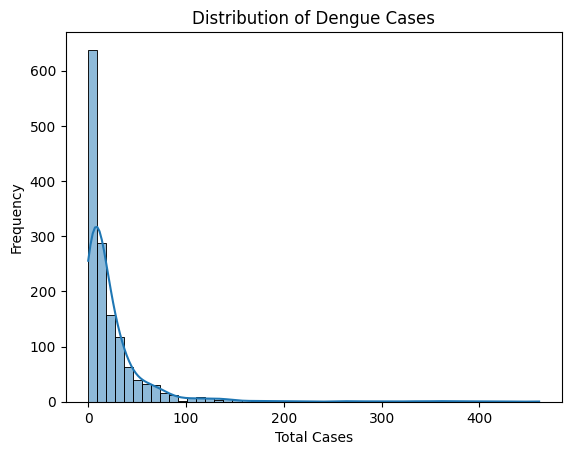

<Axes: xlabel='week_start_date', ylabel='total_cases'>

Text(0.5, 1.0, 'Time Series of Dengue Cases')

Text(0.5, 0, 'Week Start Date')

Text(0, 0.5, 'Total Cases')

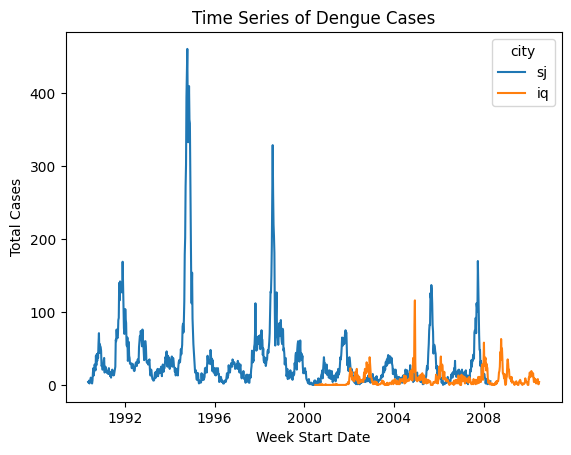

<Figure size 2000x2000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix')

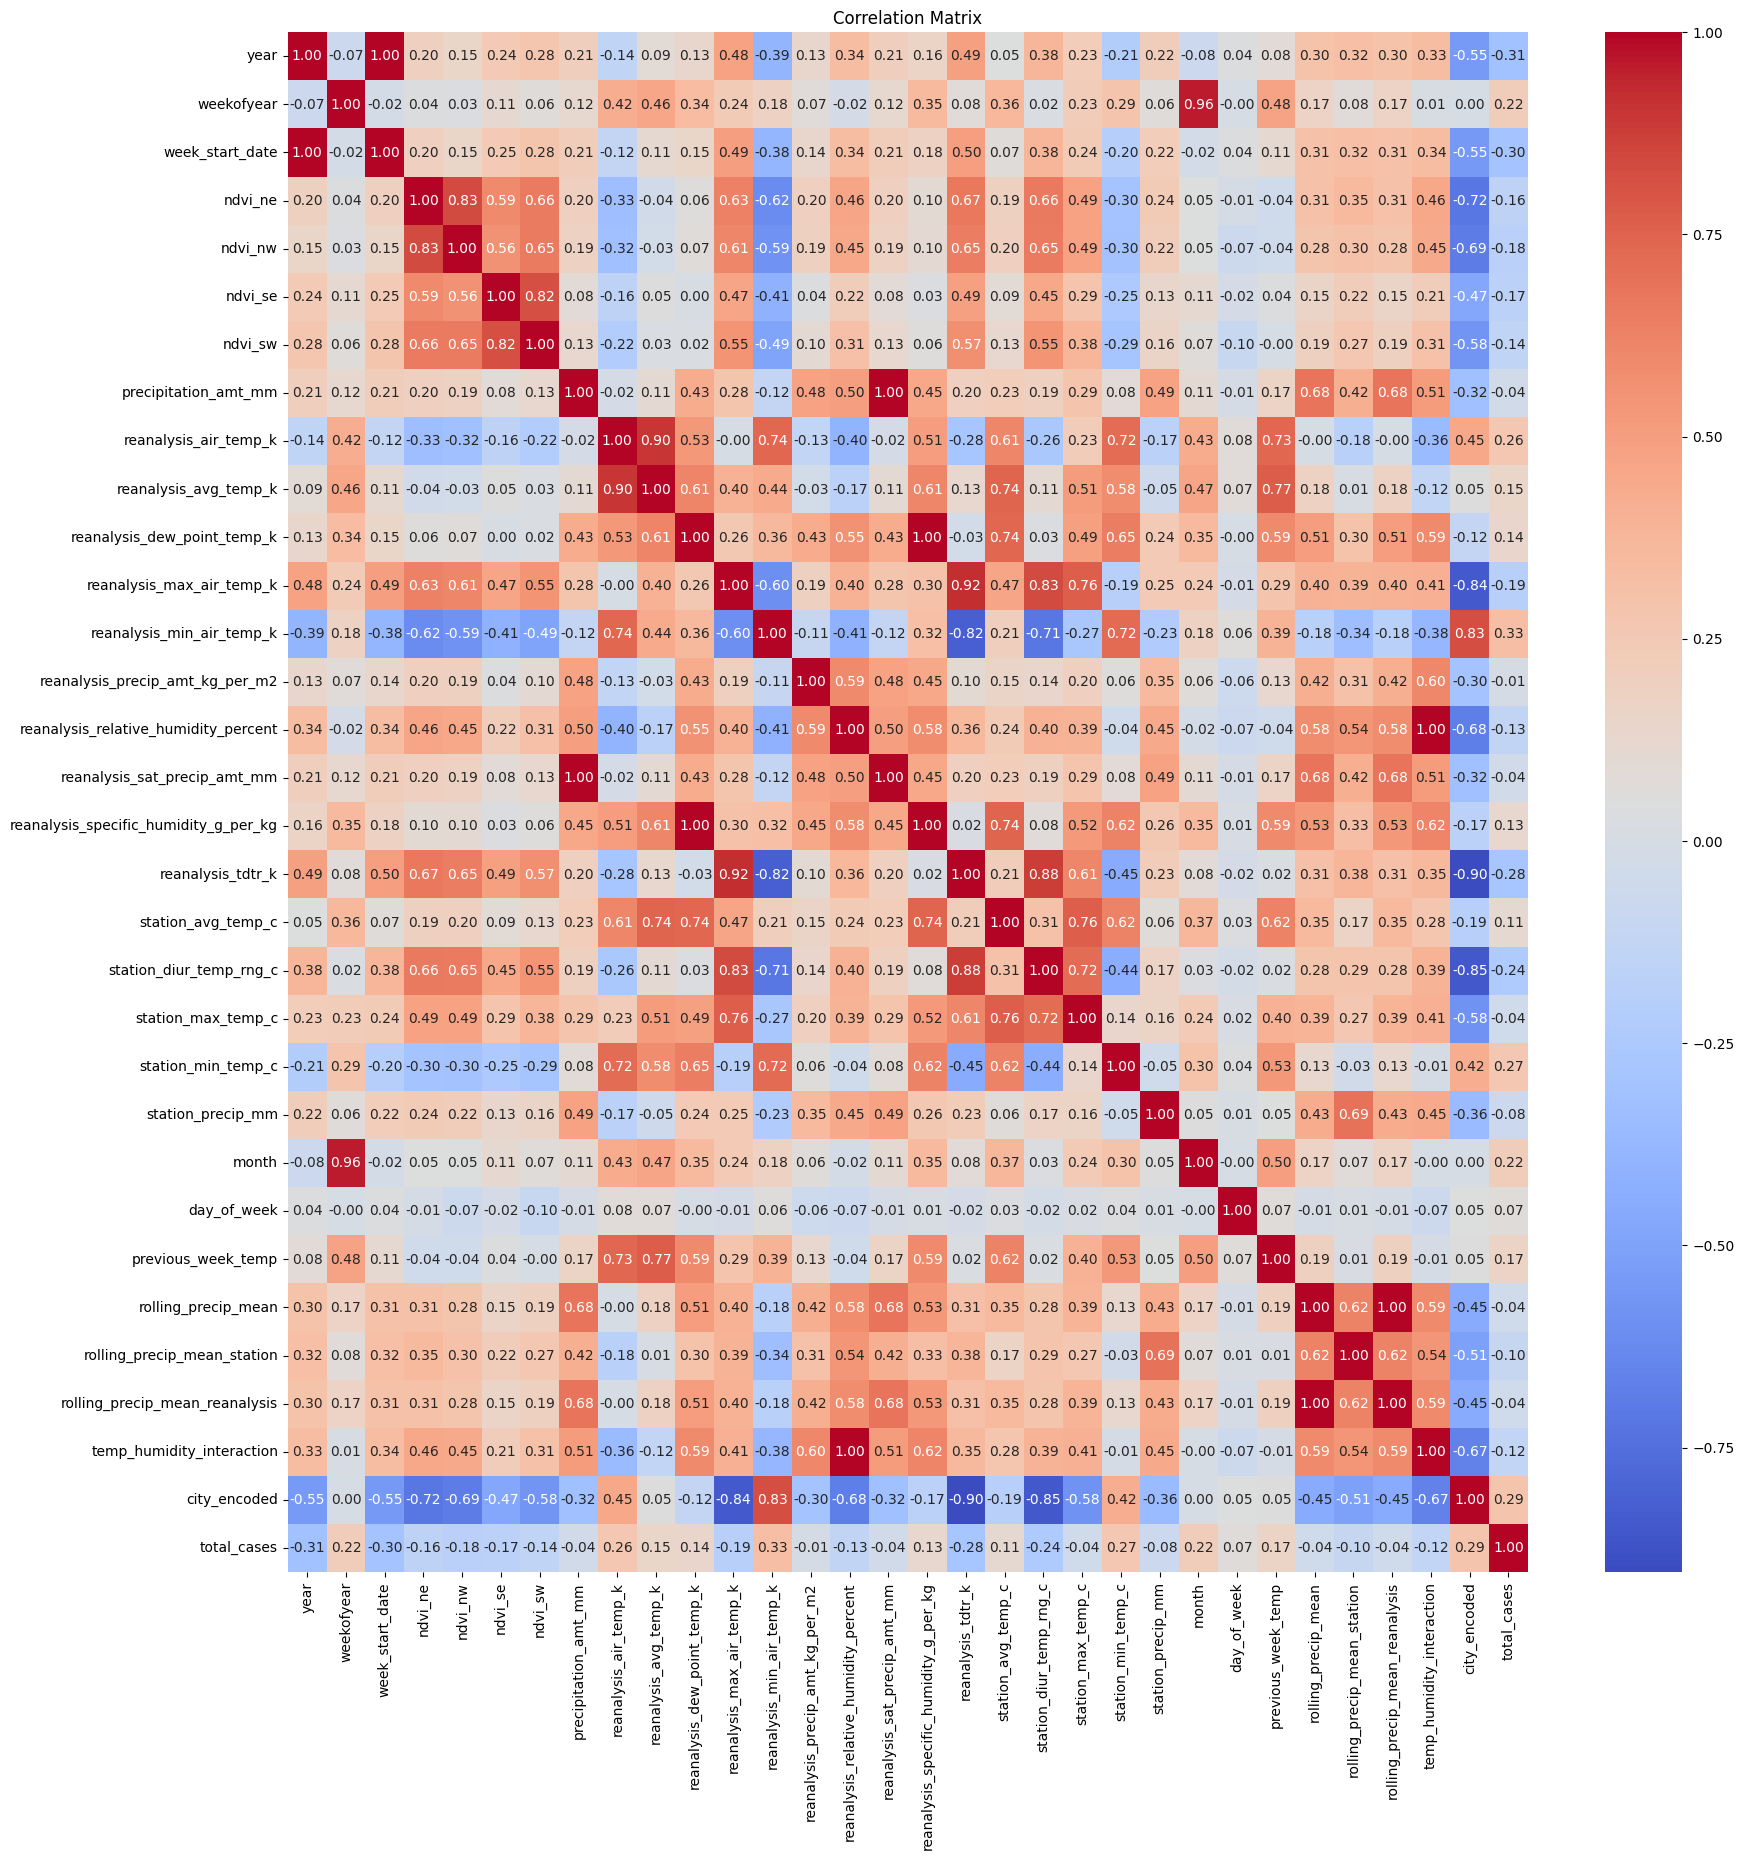

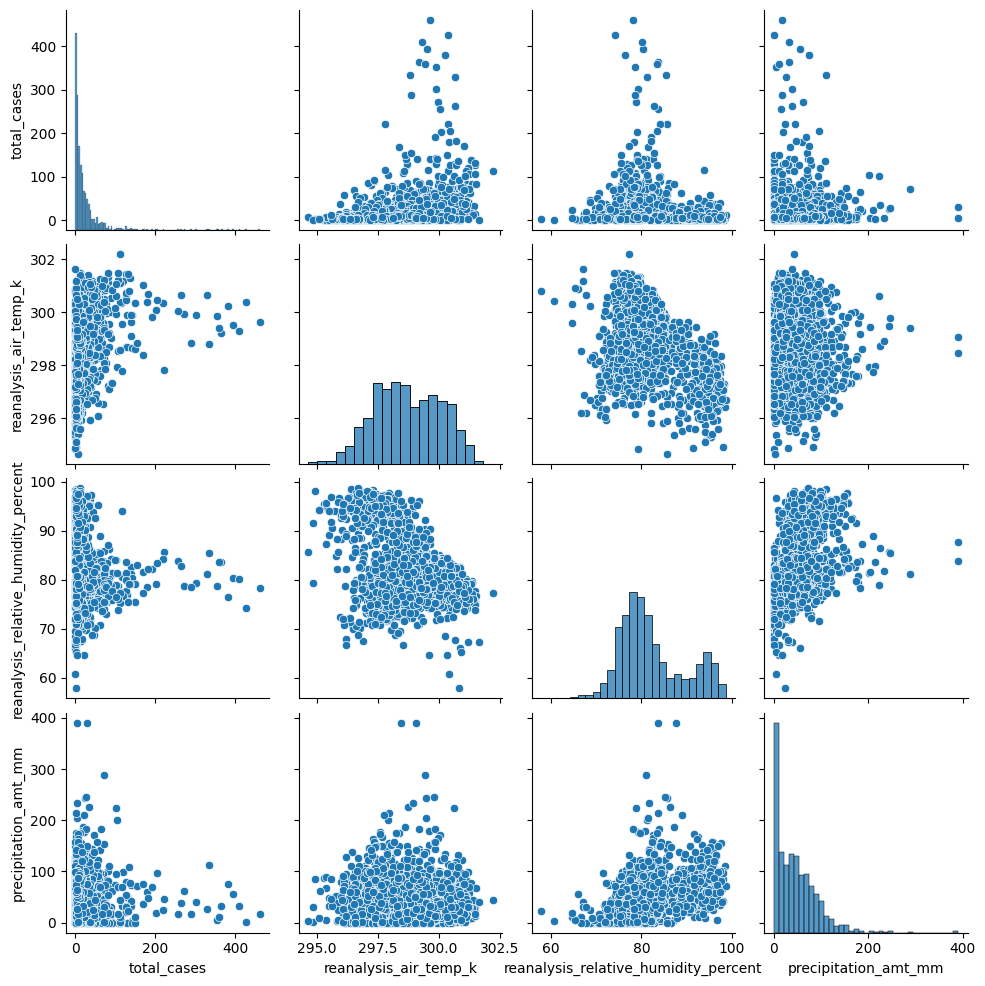

<Axes: xlabel='city', ylabel='total_cases'>

Text(0.5, 1.0, 'Distribution of Dengue Cases by City')

Text(0.5, 0, 'City')

Text(0, 0.5, 'Total Cases')

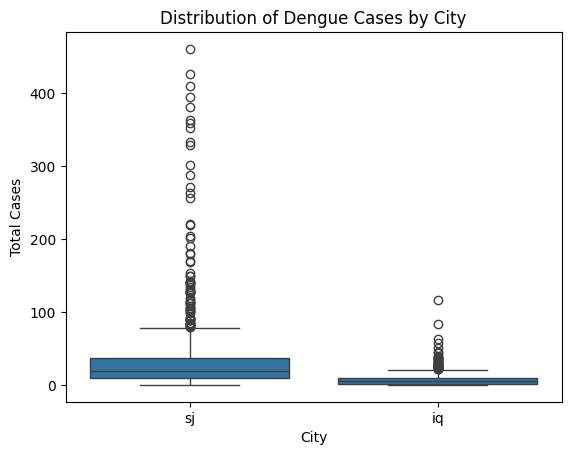

In [15]:
# Histograms
sns.histplot(data=dengue_feature_train_data, x='total_cases', bins=50, kde=True)
plt.title('Distribution of Dengue Cases')
plt.xlabel('Total Cases')
plt.ylabel('Frequency')
plt.show()

# Time Series Plot
sns.lineplot(data=dengue_feature_train_data, x='week_start_date', y='total_cases', hue='city')
plt.title('Time Series of Dengue Cases')
plt.xlabel('Week Start Date')
plt.ylabel('Total Cases')
plt.show()

# Correlation Matrix
plt.figure(figsize=(20,20))
Corr_data = dengue_feature_train_data.drop(columns=['city'])
correlation_matrix = Corr_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Pairplot
sns.pairplot(dengue_feature_train_data[['total_cases', 'reanalysis_air_temp_k', 'reanalysis_relative_humidity_percent', 'precipitation_amt_mm']])
plt.show()

# Boxplot
sns.boxplot(data=dengue_feature_train_data, x='city', y='total_cases')
plt.title('Distribution of Dengue Cases by City')
plt.xlabel('City')
plt.ylabel('Total Cases')
plt.show()


In [16]:
dengue_feature_train_data.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'month', 'day_of_week',
       'previous_week_temp', 'rolling_precip_mean',
       'rolling_precip_mean_station', 'rolling_precip_mean_reanalysis',
       'temp_humidity_interaction', 'city_encoded', 'total_cases'],
      dtype='object')

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Define numerical features
numerical_features = ['year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'month', 'day_of_week',
       'previous_week_temp', 'rolling_precip_mean',
       'rolling_precip_mean_station', 'rolling_precip_mean_reanalysis',
       'temp_humidity_interaction', 'city_encoded', 'total_cases']

# Fit scaler on training data and transform both training and testing data
# dengue_feature_train_data[numerical_features] = scaler.fit_transform(dengue_feature_train_data[numerical_features])
# dengue_feature_test_data[numerical_features] = scaler.transform(dengue_feature_test_data[numerical_features])


In [18]:
# # Separate data for each city  sj for San Juan and iq for Iquitos

# San_Juan_train = dengue_feature_train_data[dengue_feature_train_data['city'] == 'sj']
# Iquitos_train = dengue_feature_train_data[dengue_feature_train_data['city'] == 'iq']

# San_Juan_test = dengue_feature_test_data[dengue_feature_test_data['city'] == 'sj']
# Iquitos_test = dengue_feature_test_data[dengue_feature_test_data['city'] == 'iq']

In [19]:
# from sklearn.model_selection import train_test_split

# # Split data into features and target variable
# San_Juan_X = San_Juan_train.drop(columns=['total_cases','city','week_start_date'])
# San_Juan_y = San_Juan_train['total_cases']

# Iquitos_X = Iquitos_train.drop(columns=['total_cases','city','week_start_date'])
# Iquitos_y = Iquitos_train['total_cases']

# # Split data into training and testing sets
# San_Juan_X_train, San_Juan_X_test, San_Juan_y_train, San_Juan_y_test = train_test_split(San_Juan_X, San_Juan_y, test_size=0.2, random_state=49)
# Iquitos_X_train, Iquitos_X_test, Iquitos_X_train, Iquitos_y_test = train_test_split(Iquitos_X, Iquitos_y, test_size=0.2, random_state=49)

In [20]:
# print(San_Juan_X_train.shape)
# print(San_Juan_X_test.shape)
# print(San_Juan_y_train.shape)
# print(San_Juan_y_test.shape)

In [22]:
from pmdarima.arima import auto_arima

# Assuming 'dengue_feature_data' is your DataFrame containing the target variable ('total_cases') and features
target_variable = dengue_feature_train_data['total_cases']
exogenous_variables = dengue_feature_train_data[numerical_features]  # List of exogenous variables

# Use auto_arima to find the optimal ARIMA parameters
arima_model = auto_arima(target_variable, exogenous=exogenous_variables, start_p=1, start_q=1, max_p=3, max_q=3,
                         seasonal=True, m=52, D=1, max_P=2, max_D=1, max_Q=2,
                         max_order=None, trace=True,
                         error_action='ignore',  # don't want to know if an order does not work
                         suppress_warnings=True,  # don't want convergence warnings
                         stepwise=True, random_state=42, n_fits=20)

# Print the summary of the model
print(arima_model.summary())


Performing stepwise search to minimize aic


MemoryError: Unable to allocate 125. MiB for an array with shape (106, 106, 1455) and data type float64

In [79]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Assume 'df' is your DataFrame with 'total_cases' and other relevant features
# Assume 'numerical_features' contains exogenous variables/features

# Split data into train and test sets
train_data, test_data = train_test_split(dengue_feature_train_data, test_size=0.2, shuffle=False)

# Define SARIMAX model parameters
p = 1  # Autoregressive order
d = 1  # Integration order
q = 1  # Moving average order
P = 1  # Seasonal autoregressive order
D = 1  # Seasonal integration order
Q = 1  # Seasonal moving average order
m = 53  # Seasonal period (assuming weekly data)

# Fit SARIMAX model
sarimax_model = SARIMAX(train_data['total_cases'], exog=train_data[numerical_features], order=(p, d, q), seasonal_order=(P, D, Q, m))
sarimax_result = sarimax_model.fit()

# Make predictions
sarimax_forecast = sarimax_result.predict(start=test_data.index[0], end=test_data.index[-1], exog=test_data[numerical_features])

# Evaluate model performance
mse = mean_squared_error(test_data['total_cases'], sarimax_forecast)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


c:\Users\nilak\.conda\envs\dsp_ucsc\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Root Mean Squared Error (RMSE): 43.91128142095924


In [81]:
# Prediction
X_test_sarimax = test_data[numerical_features]
sarimax_predictions = sarimax_result.predict(start=test_data.index[0], end=test_data.index[-1], exog=X_test_sarimax)

# Evaluate the model
mse = mean_squared_error(test_data['total_cases'], sarimax_predictions)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error: 1928.2006360306805
Root Mean Squared Error (RMSE): 43.91128142095924


In [70]:
# # Make predictions# Adjust start and end indices for prediction
# start_idx = test_data.index[0]
# end_idx = test_data.index[-1]

# # Make predictions
# sarimax_forecast = sarimax_result.predict(start=start_idx, end=end_idx, exog=test_data[exog_var])


# # Evaluate model performance
# mse = mean_squared_error(test_data['total_cases'], sarimax_forecast)
# rmse = np.sqrt(mse)
# print("Root Mean Squared Error (RMSE):", rmse)

In [71]:
# from sklearn.ensemble import RandomForestRegressor

# # Initialize Random Forest regressor
# rf_model = RandomForestRegressor(n_estimators=100, random_state=49)

# # Fit the model
# rf_model.fit(San_Juan_X_train, San_Juan_y_train)

# # Make predictions
# rf_predictions = rf_model.predict(San_Juan_X_test)


In [72]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# mae = mean_absolute_error(San_Juan_y_test, rf_predictions)
# mse = mean_squared_error(San_Juan_y_test, rf_predictions)
# rmse = np.sqrt(mse)

# print("Mean Absolute Error:", mae)
# print("Root Mean Squared Error:", rmse)


In [73]:
# plt.figure(figsize=(10, 6))
# plt.scatter(San_Juan_y_test, rf_predictions, color='blue', alpha=0.5)
# plt.plot([San_Juan_y_test.min(), San_Juan_y_test.max()], [San_Juan_y_test.min(), San_Juan_y_test.max()], linestyle='--', color='red')
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title('Actual vs. Predicted Values')
# plt.show()


In [74]:
# # Get feature names
# feature_names = San_Juan_X_train.columns

# # Get feature importances
# feature_importance = rf_model.feature_importances_

# # Sort feature importances and corresponding feature names
# sorted_idx = np.argsort(feature_importance)[::-1]
# sorted_feature_names = feature_names[sorted_idx]

# # Plot feature importances
# plt.figure(figsize=(10, 6))
# plt.bar(range(San_Juan_X_train.shape[1]), feature_importance[sorted_idx], align='center')
# plt.xticks(range(San_Juan_X_train.shape[1]), sorted_feature_names, rotation=90)
# plt.xlabel('Feature')
# plt.ylabel('Feature Importance')
# plt.title('Feature Importance')
# plt.show()


In [75]:
# from sklearn.ensemble import GradientBoostingRegressor

# # Initialize Gradient Boosting regressor
# gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=49)

# # Fit the model
# gbm_model.fit(San_Juan_X_train, San_Juan_y_train)

# # Make predictions
# gbm_predictions = gbm_model.predict(San_Juan_X_test)


In [76]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # Calculate Mean Absolute Error (MAE)
# mae = mean_absolute_error(San_Juan_y_test, gbm_predictions)

# # Calculate Mean Squared Error (MSE)
# mse = mean_squared_error(San_Juan_y_test, gbm_predictions)

# # Calculate R-squared (R2) score
# r2 = r2_score(San_Juan_y_test, gbm_predictions)

# print("Mean Absolute Error (MAE):", mae)
# print("Mean Squared Error (MSE):", mse)
# print("R-squared (R2) Score:", r2)


In [77]:
# from keras.models import Sequential
# from keras.layers import LSTM, Dense

# # Reshape data for LSTM input
# X_train_lstm = np.array(San_Juan_X_train).reshape(San_Juan_X_train.shape[0], San_Juan_X_train.shape[1], 1)
# X_test_lstm = np.array(San_Juan_X_test).reshape(San_Juan_X_test.shape[0], San_Juan_X_test.shape[1], 1)

# # # Reshape data for LSTM input
# # X_train_lstm = San_Juan_X_train.reshape(San_Juan_X_train.shape[0], San_Juan_X_train.shape[1], 1)
# # X_test_lstm = San_Juan_X_test.reshape(San_Juan_X_test.shape[0], San_Juan_X_test.shape[1], 1)

# # Initialize LSTM model
# lstm_model = Sequential()
# lstm_model.add(LSTM(units=50, input_shape=(X_train_lstm.shape[1], 1)))
# lstm_model.add(Dense(units=1))

# # Compile the model
# lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# # Fit the model
# lstm_model.fit(X_train_lstm, San_Juan_y_train, epochs=100, batch_size=32)

# # Make predictions
# lstm_predictions = lstm_model.predict(X_test_lstm)


In [78]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error

# # Make predictions
# lstm_predictions = lstm_model.predict(X_test_lstm)

# # Evaluate the model
# mse = mean_squared_error(San_Juan_y_test, lstm_predictions)
# mae = mean_absolute_error(San_Juan_y_test, lstm_predictions)

# print("Mean Squared Error (MSE):", mse)
# print("Mean Absolute Error (MAE):", mae)
